In [1]:
# https://www.bfs.admin.ch/bfs/fr/home/services/recherche/api.html
# https://dam-api.bfs.admin.ch/hub/swagger-ui/index.html
# communes
# https://www.bfs.admin.ch/bfs/fr/home/services/recherche/api/api-gemeinde.assetdetail.15224055.html

# motorisation
# https://www.pxweb.bfs.admin.ch/sq/ccc96ddd-61a9-49ab-ad7f-dabbc934e8c0

import requests

# Population
dataset_url = 'https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-0102030000_101/px-x-0102030000_101.px'
dataset_url = 'https://www.pxweb.bfs.admin.ch/api/v1/fr/px-x-1103020100_165/px-x-1103020100_165.px'

metadata_response = requests.get(dataset_url)
metadata_json = metadata_response.json()

response = requests.post(dataset_url, json={
  "query": [
    {
      "code": "Treibstoff",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "400",
          "500",
          "600",
          "9900"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
})
json = response.json()
print(json)


response_canton = requests.post(dataset_url, json={
  "query": [
    {
      "code": "Kanton",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27"
        ]
      }
    },
    {
      "code": "Treibstoff",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "400",
          "500",
          "600",
          "9900"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
})
json_canton = response_canton.json()

{'dataset': {'dimension': {'Treibstoff': {'label': 'Carburant', 'category': {'index': {'100': 0, '200': 1, '300': 2, '400': 3, '500': 4, '600': 5, '9900': 6}, 'label': {'100': 'Essence', '200': 'Diesel', '300': 'Essence-électrique: hybride', '400': 'Diesel-électrique: hybride', '500': 'Électrique', '600': 'Gaz (monovalent et bivalent)', '9900': 'Autre'}}}, 'Jahr': {'label': 'Année', 'category': {'index': {'2005': 0, '2006': 1, '2007': 2, '2008': 3, '2009': 4, '2010': 5, '2011': 6, '2012': 7, '2013': 8, '2014': 9, '2015': 10, '2016': 11, '2017': 12, '2018': 13, '2019': 14, '2020': 15, '2021': 16}, 'label': {'2005': '2005', '2006': '2006', '2007': '2007', '2008': '2008', '2009': '2009', '2010': '2010', '2011': '2011', '2012': '2012', '2013': '2013', '2014': '2014', '2015': '2015', '2016': '2016', '2017': '2017', '2018': '2018', '2019': '2019', '2020': '2020', '2021': '2021'}}}, 'id': ['Treibstoff', 'Jahr'], 'size': [7, 17], 'role': {'time': ['Jahr']}}, 'label': 'Parc de motocycles selon 

In [2]:
for elem in json['dataset']['dimension']['id']:
    print('====')
    for k, v in json['dataset']['dimension'][elem].items():
        print(f'{k}: {v}')


====
label: Carburant
category: {'index': {'100': 0, '200': 1, '300': 2, '400': 3, '500': 4, '600': 5, '9900': 6}, 'label': {'100': 'Essence', '200': 'Diesel', '300': 'Essence-électrique: hybride', '400': 'Diesel-électrique: hybride', '500': 'Électrique', '600': 'Gaz (monovalent et bivalent)', '9900': 'Autre'}}
====
label: Année
category: {'index': {'2005': 0, '2006': 1, '2007': 2, '2008': 3, '2009': 4, '2010': 5, '2011': 6, '2012': 7, '2013': 8, '2014': 9, '2015': 10, '2016': 11, '2017': 12, '2018': 13, '2019': 14, '2020': 15, '2021': 16}, 'label': {'2005': '2005', '2006': '2006', '2007': '2007', '2008': '2008', '2009': '2009', '2010': '2010', '2011': '2011', '2012': '2012', '2013': '2013', '2014': '2014', '2015': '2015', '2016': '2016', '2017': '2017', '2018': '2018', '2019': '2019', '2020': '2020', '2021': '2021'}}


In [3]:
import pandas as pd

values = {"values": json['dataset']['value']}
length = 1
total_length = len(json['dataset']['value'])
for dimension_id in json['dataset']['dimension']['id']:
    dimension = json['dataset']['dimension'][dimension_id]
    
    current_length = len(dimension['category']['index'])
    nb = int(total_length / (length * current_length))
    
    v = list(json['dataset']['value'])
    for x in range(length):
        for y, value in enumerate(dimension['category']['label'].values()):
            for z in range(nb):
                v[x * current_length * nb + y * nb + z] = value
    
    values[dimension['label']] = v
            
    length *= current_length

df = pd.DataFrame(values)
df
#print(json['dataset']['value'])

     values Carburant Année
0    588376   Essence  2005
1    605189   Essence  2006
2    615196   Essence  2007
3    632082   Essence  2008
4    638966   Essence  2009
..      ...       ...   ...
114      60     Autre  2017
115      54     Autre  2018
116      51     Autre  2019
117      50     Autre  2020
118      52     Autre  2021

[119 rows x 3 columns]


In [32]:
elem_key = json['dataset']['dimension']['id'][0]
elem_dataset = json['dataset']['dimension'][elem_key]
year_key = json['dataset']['dimension']['id'][1]
year_dataset = json['dataset']['dimension'][year_key]
year_length = len(year_dataset['category']['index'])
values_bokeh={
    'year': year_dataset['category']['label'].values()
}
col_bokeh = []
for key, index in elem_dataset['category']['index'].items():
    start = index*year_length
    values_bokeh[elem_dataset['category']['label'][key]] = json['dataset']['value'][start: start+year_length]
    col_bokeh.append(elem_dataset['category']['label'][key])

df_bokeh = pd.DataFrame(values_bokeh)
print(col_bokeh)
print(df_bokeh)

['Essence', 'Diesel', 'Essence-électrique: hybride', 'Diesel-électrique: hybride', 'Électrique', 'Gaz (monovalent et bivalent)', 'Autre']
    year  Essence  Diesel  Essence-électrique: hybride  \
0   2005   588376    1139                           51   
1   2006   605189    1274                            1   
2   2007   615196    1614                            9   
3   2008   632082    1154                           23   
4   2009   638966    1112                           25   
5   2010   646481    1084                           54   
6   2011   659298    1064                           64   
7   2012   670718    1021                           67   
8   2013   677582     728                           74   
9   2014   687524     864                           79   
10  2015   697612     837                           73   
11  2016   707703     797                           75   
12  2017   716194     782                           72   
13  2018   725731     760                         

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

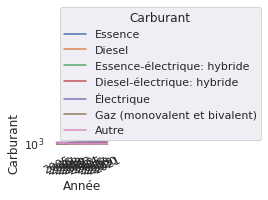

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_theme(style="darkgrid")

sns.set(rc={"figure.figsize":(4, 1)})
sns.lineplot(x="Année", y="values",
             hue="Carburant",
             data=df)

plt.yscale('log')
plt.ylabel("Carburant")
plt.xticks(rotation = 25)

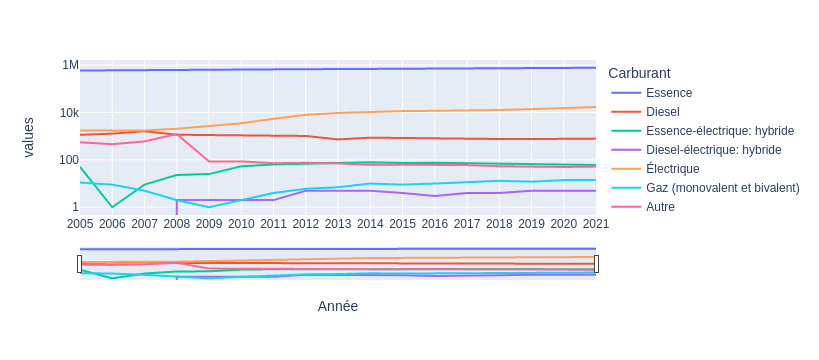

In [62]:
import plotly.express as px

fig = px.line(df, x="Année", y="values", color='Carburant')
fig.update_layout(yaxis_type="log",
    xaxis = {
        'rangeslider': {
            'visible': True
        },
    }
)
fig.show()

In [6]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: /home/sbrunner/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [61]:
pd.set_option('plotting.backend', 'pandas_bokeh')

#fig = px.line(df, x="Année", y="values", color='Carburant')
df_bokeh.plot_bokeh.line(
    figsize=(800, 450),
    x='year',
    y=col_bokeh,
    title="Carburant",
    xlabel="Date",
    ylabel="Voitures", rangetool=True)
# y_axis_type='log'

Column(id='3940', ...)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()